In [ ]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '336699',
    'database': 'sakila'
}

conn = None  # Initialize conn to None

try:
    # establish connection
    conn = pymysql.connect(**db_config)
    cursor = conn.cursor()

    # creating database if not exists
    cursor.execute("CREATE DATABASE IF NOT EXISTS project")
    # using the database
    cursor.execute("USE project")
    # creating table if not exists
    create_table_query = """create table if not exists Olympic (
        ID int,
        Name varchar(100),
        Sex enum("F","M"),
        Age int,
        Height int,
        Weight int,
        Team varchar(60),
        NOC char(3),
        Games varchar(25),
        Year int,
        Season enum("Summer", "Winter"),
        City char(50),
        Sport char(35),
        Event varchar(100),
        Medal char(10)
    );
    """
    
    # executing the create table query
    cursor.execute(create_table_query)
    print("Table Olympic successfully created in project database")

except pymysql.MySQLError as err:
    print(f"Error: {err}")

Table Olympic successfully created in project database


In [7]:
import mysql.connector

# Load the data from the Excel file
file_path = "C:/Users/HP/Desktop/ANUDIP/Project Final/Olympics Dataset.xlsx"
data = pd.read_excel(file_path)

# Check for NaN values in the DataFrame
nan_summary = data.isna().sum()

# Print the summary of NaN values
print("Summary of NaN values in the DataFrame:")
print(nan_summary)

Summary of NaN values in the DataFrame:
ID             0
Name           0
Sex            0
Age         9474
Height     60172
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [8]:
#database connection details above done already

#replacing the NaN with required value of each column before inserting to database
# Replace NaN values with default values
data.fillna(
    {
    'Age': 0,
    'Height': 0,
    'Weight': 0,
    'Medal': "None"
}, inplace=True)

# Preparing to insert data into the database
insert_query = """
INSERT INTO Olympic (ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
# Inserting data into the database
for row in data.itertuples(index=False, name=None):
    try:
        cursor.execute(insert_query, row)
    except mysql.connector.Error as err:
        print(f"Error inserting row {row}:{err}")
        continue

#commit connection
conn.commit()
print("Data Inserted successfully")
conn.close()
cursor.close()

Data Inserted successfully


In [9]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug Of War,Tug Of War Men's Tug Of War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [10]:
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,None


In [11]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,24.663827,136.423859,54.305674,1978.378480
std,39022.286345,7.840652,73.450960,32.381492,29.877632
min,1.000000,0.000000,0.000000,0.000000,1896.000000
25%,34643.000000,21.000000,157.000000,47.000000,1960.000000
50%,68205.000000,24.000000,171.000000,64.000000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [14]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")
data.shape

Number of Rows: 271116
Number of Columns: 15


(271116, 15)

In [15]:
data.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [16]:
# finding the unique values
data.nunique(axis=0)

ID        135571
Name      134732
Sex            2
Age           75
Height        96
Weight       221
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

In [17]:
#checking the duplicates
print(data[data.duplicated()])

#total number of duplicates 
data.duplicated().sum()

            ID                                 Name Sex   Age  Height  Weight  \
1252       704                   Dsir Antoine Acket   M  27.0     0.0     0.0   
4282      2449               William Truman Aldrich   M  48.0     0.0     0.0   
4283      2449               William Truman Aldrich   M  48.0     0.0     0.0   
4862      2777               Hermann Reinhard Alker   M  43.0     0.0     0.0   
4864      2777               Hermann Reinhard Alker   M  43.0     0.0     0.0   
...        ...                                  ...  ..   ...     ...     ...   
269994  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     0.0     0.0   
269995  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     0.0     0.0   
269997  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     0.0     0.0   
269999  135073   Doris Clare Zinkeisen (-Johnstone)   F  49.0     0.0     0.0   
270200  135173                     Henri Achille Zo   M  58.0     0.0     0.0   

                 Team  NOC 

np.int64(1385)

In [18]:
#dropping the duplicates
data.drop_duplicates(inplace= True)

Basic Analysis

In [19]:
# Finding all unique sports 
print(f"Number of unique sports are: {data['Sport'].nunique()}")

data['Sport'].unique()
for i in sorted(data['Sport'].unique()):
    print(i)

Number of unique sports are: 66
Aeronautics
Alpine Skiing
Alpinism
Archery
Art Competitions
Athletics
Badminton
Baseball
Basketball
Basque Pelota
Beach Volleyball
Biathlon
Bobsleigh
Boxing
Canoeing
Cricket
Croquet
Cross Country Skiing
Curling
Cycling
Diving
Equestrianism
Fencing
Figure Skating
Football
Freestyle Skiing
Golf
Gymnastics
Handball
Hockey
Ice Hockey
Jeu De Paume
Judo
Lacrosse
Luge
Military Ski Patrol
Modern Pentathlon
Motorboating
Nordic Combined
Polo
Racquets
Rhythmic Gymnastics
Roque
Rowing
Rugby
Rugby Sevens
Sailing
Shooting
Short Track Speed Skating
Skeleton
Ski Jumping
Snowboarding
Softball
Speed Skating
Swimming
Synchronized Swimming
Table Tennis
Taekwondo
Tennis
Trampolining
Triathlon
Tug Of War
Volleyball
Water Polo
Weightlifting
Wrestling


In [20]:
#Top 10 sport with most athletes in the world
data['Sport'].value_counts().head(10).reset_index()

,Sport,count
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10827
5,Fencing,10735
6,Rowing,10595
7,Cross Country Skiing,9133
8,Alpine Skiing,8829
9,Wrestling,7154


In [21]:
# 10 sport with least athletes in the world
data['Sport'].value_counts().nsmallest(10).reset_index()

,Sport,count
0,Aeronautics,1
1,Basque Pelota,2
2,Roque,4
3,Jeu De Paume,11
4,Racquets,12
5,Motorboating,17
6,Croquet,19
7,Cricket,24
8,Military Ski Patrol,24
9,Alpinism,25


In [22]:
#Finding the most successful athlete by count of medals 
data.groupby('Name')['Medal'].count().sort_values(ascending=False).reset_index().head(10)

,Name,Medal
0,Heikki Ilmari Savolainen,39
1,"Joseph ""Josy"" Stoffel",38
2,Ioannis Theofilakis,36
3,Takashi Ono,33
4,Andreas Wecker,32
5,Alexandros Theofilakis,32
6,"Johann ""Hans"" Sauter",31
7,"Alfred August ""Al"" Jochim",31
8,Michel Mathiot,31
9,"Michael Fred Phelps, II",30


In [23]:
#Finding Total number of each type of Medal
data['Medal'].value_counts()

Medal
None      229959
Gold       13369
Bronze     13295
Silver     13108
Name: count, dtype: int64

In [24]:
#Finding Unique countries participating in the Olympics
print(f"Total number of countries are: {data['Team'].nunique()}")
print("\nList of unique countries participating in the Olympics:")
for country in sorted(data['Team'].unique()):
    print(country)

Total number of countries are: 1184

List of unique countries participating in the Olympics:
30. Februar
A North American Team
Acipactli
Acturus
Afghanistan
Akatonbo
Alain IV
Albania
Alcaid
Alcyon-6
Alcyon-7
Aldebaran
Aldebaran II
Aletta
Algeria
Ali-Baba II
Ali-Baba IV
Ali-Baba IX
Ali-Baba VI
Allegro
Almaz
Aloha II
Amateur Athletic Association
American Samoa
Amolgavar
Amstel Amsterdam
Amulet-3
Amulet-7
Ancora
Andorinha
Andorra
Andromeda
Angelita
Angerburg
Angola
Anitra
Antares
Antigua and Barbuda
Antwerpia V
Apache
Aphrodite
Arcturus
Ardilla
Aretusa
Argentina
Argentina-1
Argentina-2
Argeste
Argo II
Argonaut Rowing Club
Argus
Ariel
Ariette-10
Ariette-8
Armenia
Aruba
Aschenbrodel
Astrid III
Atalanta Boat Club-1
Atalanta Boat Club-2
Athens-2
Atlanta
Augsburg
Ausonia
Australasia
Australia
Australia-1
Australia-2
Australia-3
Australia/Great Britain
Austria
Austria-1
Austria-2
Azerbaijan
BLO Polo Club, Rugby
Babe
Baby-1
Baby-9
Baccara
Bagatelle Polo Club, Paris
Bahamas
Bahrain
Bajazzo
Balato

In [25]:
#Finding Top 10 countries with most number of athletes, also print the count of athletes
top_10_countries = data['Team'].value_counts().head(10)
print(top_10_countries)

Team
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: count, dtype: int64


In [49]:
# Finding the total number of Summer and Winter sports
season_counts = data['Season'].value_counts()
season_counts

Season
Summer    221167
Winter     48564
Name: count, dtype: int64

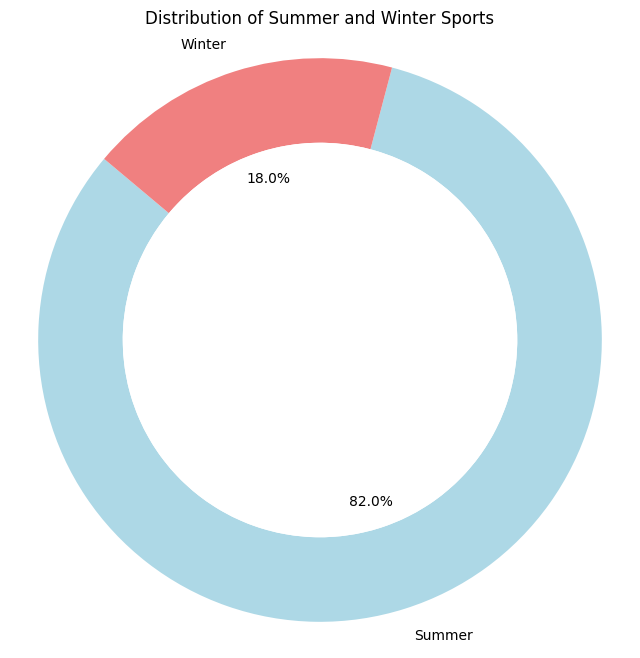

In [ ]:
# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], wedgeprops=dict(width=0.3))

# Adding a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Summer and Winter Sports')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
# Average Age of Athletes by Sport

average_age = pd.pivot_table(data, values='Age', index='Sport', aggfunc='mean')
average_age_sorted = average_age.sort_values(by='Age', ascending=False)
print("Average Age of Athletes by Sport (Sorted):")
print(average_age_sorted)

Average Age of Athletes by Sport (Sorted):
                           Age
Sport                         
Roque                40.000000
Art Competitions     37.210340
Polo                 33.473684
Equestrianism        33.349834
Jeu De Paume         32.454545
...                        ...
Swimming             20.102177
Military Ski Patrol  18.791667
Rhythmic Gymnastics  18.737082
Rugby                17.160494
Lacrosse             16.116667

[66 rows x 1 columns]


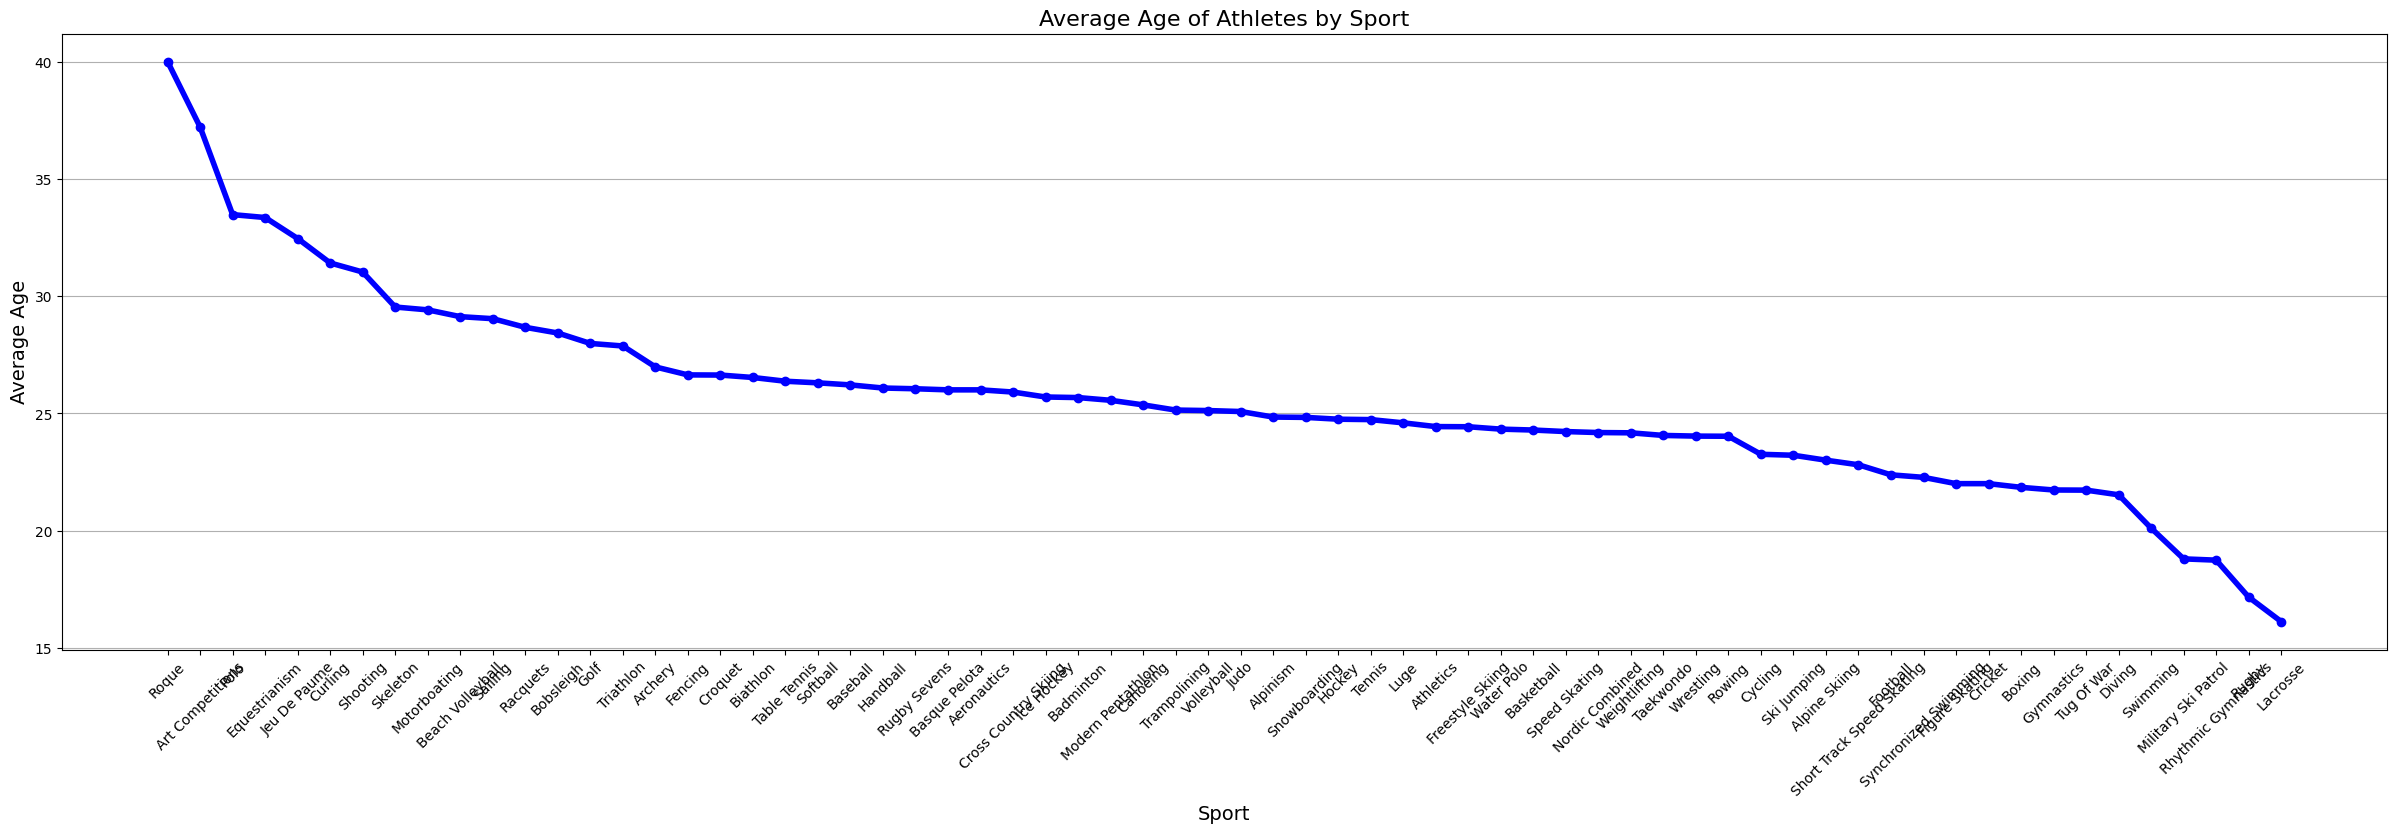

In [ ]:
# Plotting the line chart
plt.figure(figsize=(30, 8))
plt.plot(average_age_sorted.index, average_age_sorted['Age'], marker='o', color='blue', linestyle='-', linewidth=4)

# Adding titles and labels
plt.title('Average Age of Athletes by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

In [59]:
# Average height of Athletes by Sport

average_Height = pd.pivot_table(data, values='Height', index='Sport', aggfunc='mean')
average_Height_sorted = average_Height.sort_values(by='Height', ascending=False)
print("Average Height of Athletes by Sport (Sorted):")
print(average_age_sorted)

Average Height of Athletes by Sport (Sorted):
                         Height
Sport                          
Volleyball           180.347826
Beach Volleyball     179.874113
Taekwondo            174.417492
Rugby Sevens         174.190635
Triathlon            173.317580
...                         ...
Croquet                0.000000
Basque Pelota          0.000000
Alpinism               0.000000
Roque                  0.000000
Military Ski Patrol    0.000000

[66 rows x 1 columns]


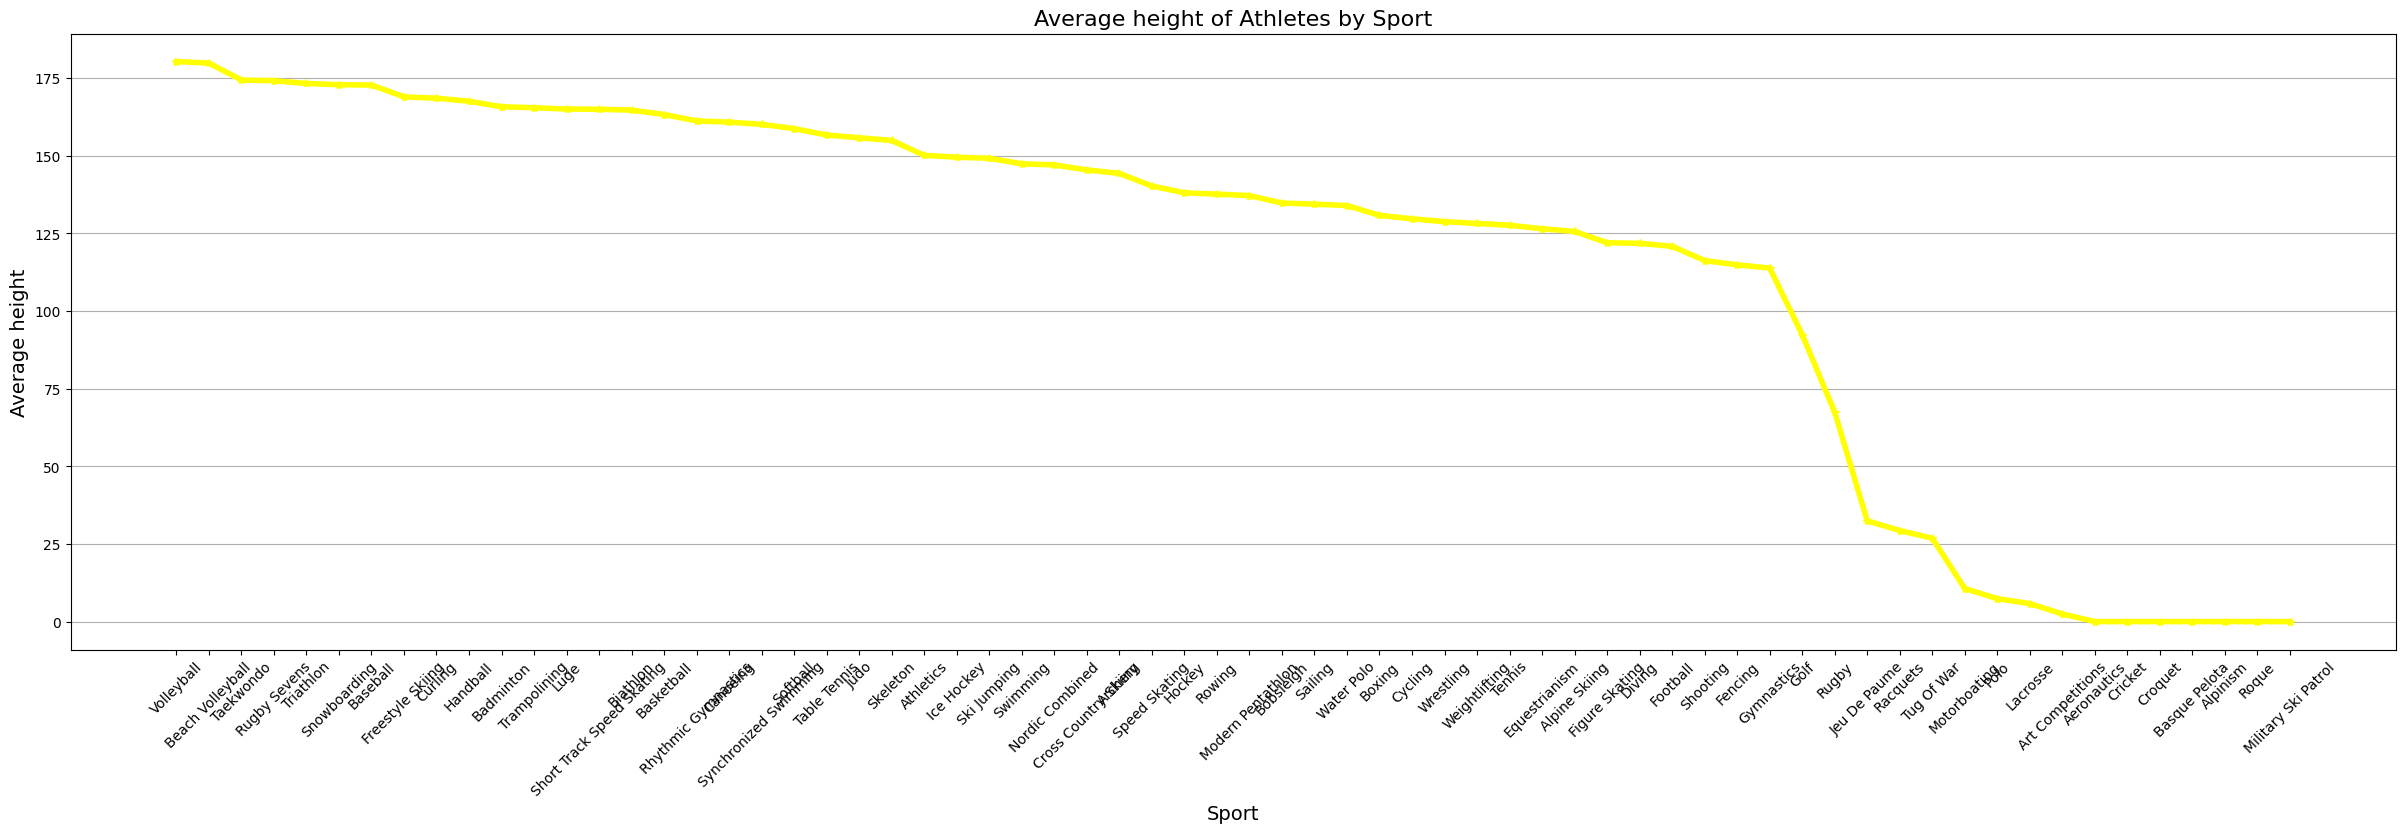

In [60]:
# Plotting the line chart
plt.figure(figsize=(30, 8))
plt.plot(average_Height_sorted.index, average_Height_sorted['Height'], marker='*', color='yellow', linestyle='-', linewidth=4)

# Adding titles and labels
plt.title('Average height of Athletes by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Average height', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [62]:
# Average weight of Athletes by Sport

average_Weight = pd.pivot_table(data, values='Weight', index='Sport', aggfunc='mean')
average_Weight_sorted = average_Weight.sort_values(by='Weight', ascending=False)
print("Average Weight of Athletes by Sport (Sorted):")
print(average_Weight_sorted)

Average Weight of Athletes by Sport (Sorted):
                        Weight
Sport                         
Baseball             81.201902
Rugby Sevens         78.939799
Weightlifting        76.047117
Volleyball           75.956522
Beach Volleyball     75.443262
...                        ...
Croquet               0.000000
Roque                 0.000000
Military Ski Patrol   0.000000
Polo                  0.000000
Racquets              0.000000

[66 rows x 1 columns]


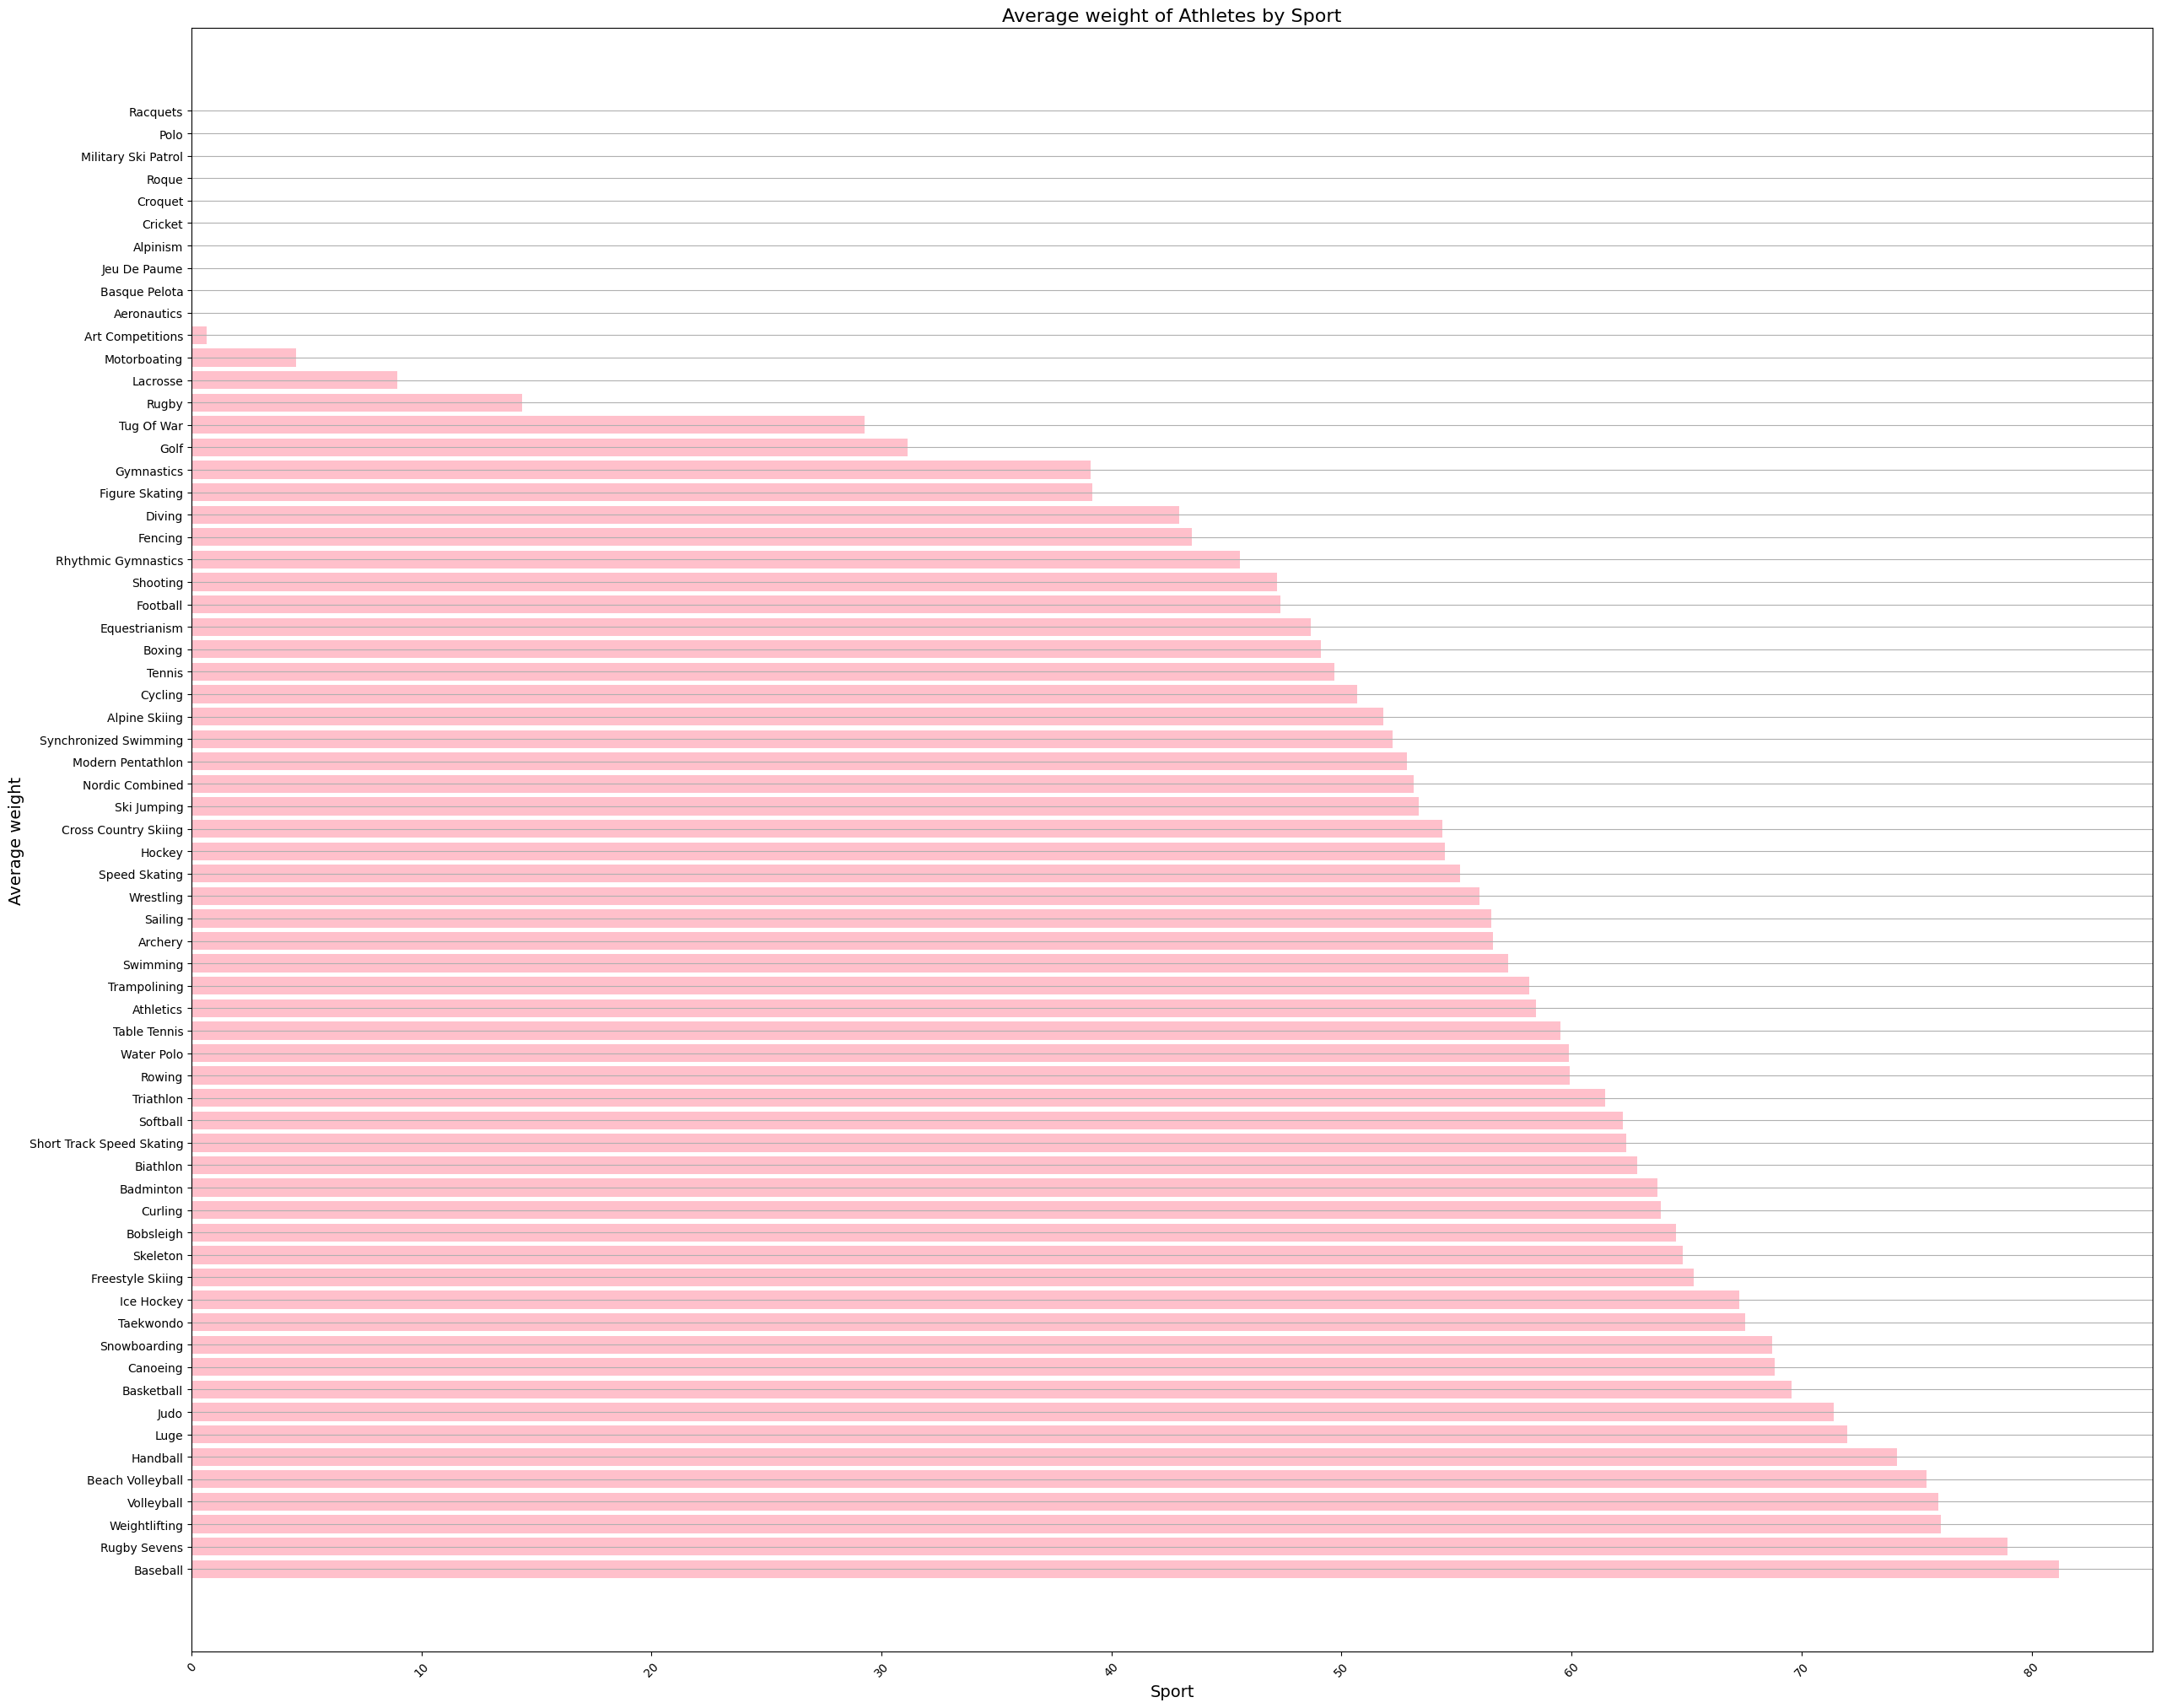

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(30, 25))
plt.barh(average_Weight_sorted.index, average_Weight_sorted['Weight'], color='pink')

# Adding titles and labels
plt.title('Average weight of Athletes by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Average weight', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [28]:
# Athlete Count by Sport:
athlete_count = pd.pivot_table(data, values='Name', index='Sport', aggfunc='count')
sorted_athlete_count = athlete_count.sort_values(by = "Name",ascending=False)

print("Top 10 Athlete by Sport:\n")
print(sorted_athlete_count.head(10))

print("\nLeast participated sports are:\n")
print(sorted_athlete_count.nsmallest(10,"Name"))

Top 10 Athlete by Sport:

                       Name
Sport                      
Athletics             38624
Gymnastics            26707
Swimming              23195
Shooting              11448
Cycling               10827
Fencing               10735
Rowing                10595
Cross Country Skiing   9133
Alpine Skiing          8829
Wrestling              7154

Least participated sports are:

                     Name
Sport                    
Aeronautics             1
Basque Pelota           2
Roque                   4
Jeu De Paume           11
Racquets               12
Motorboating           17
Croquet                19
Military Ski Patrol    24
Cricket                24
Alpinism               25


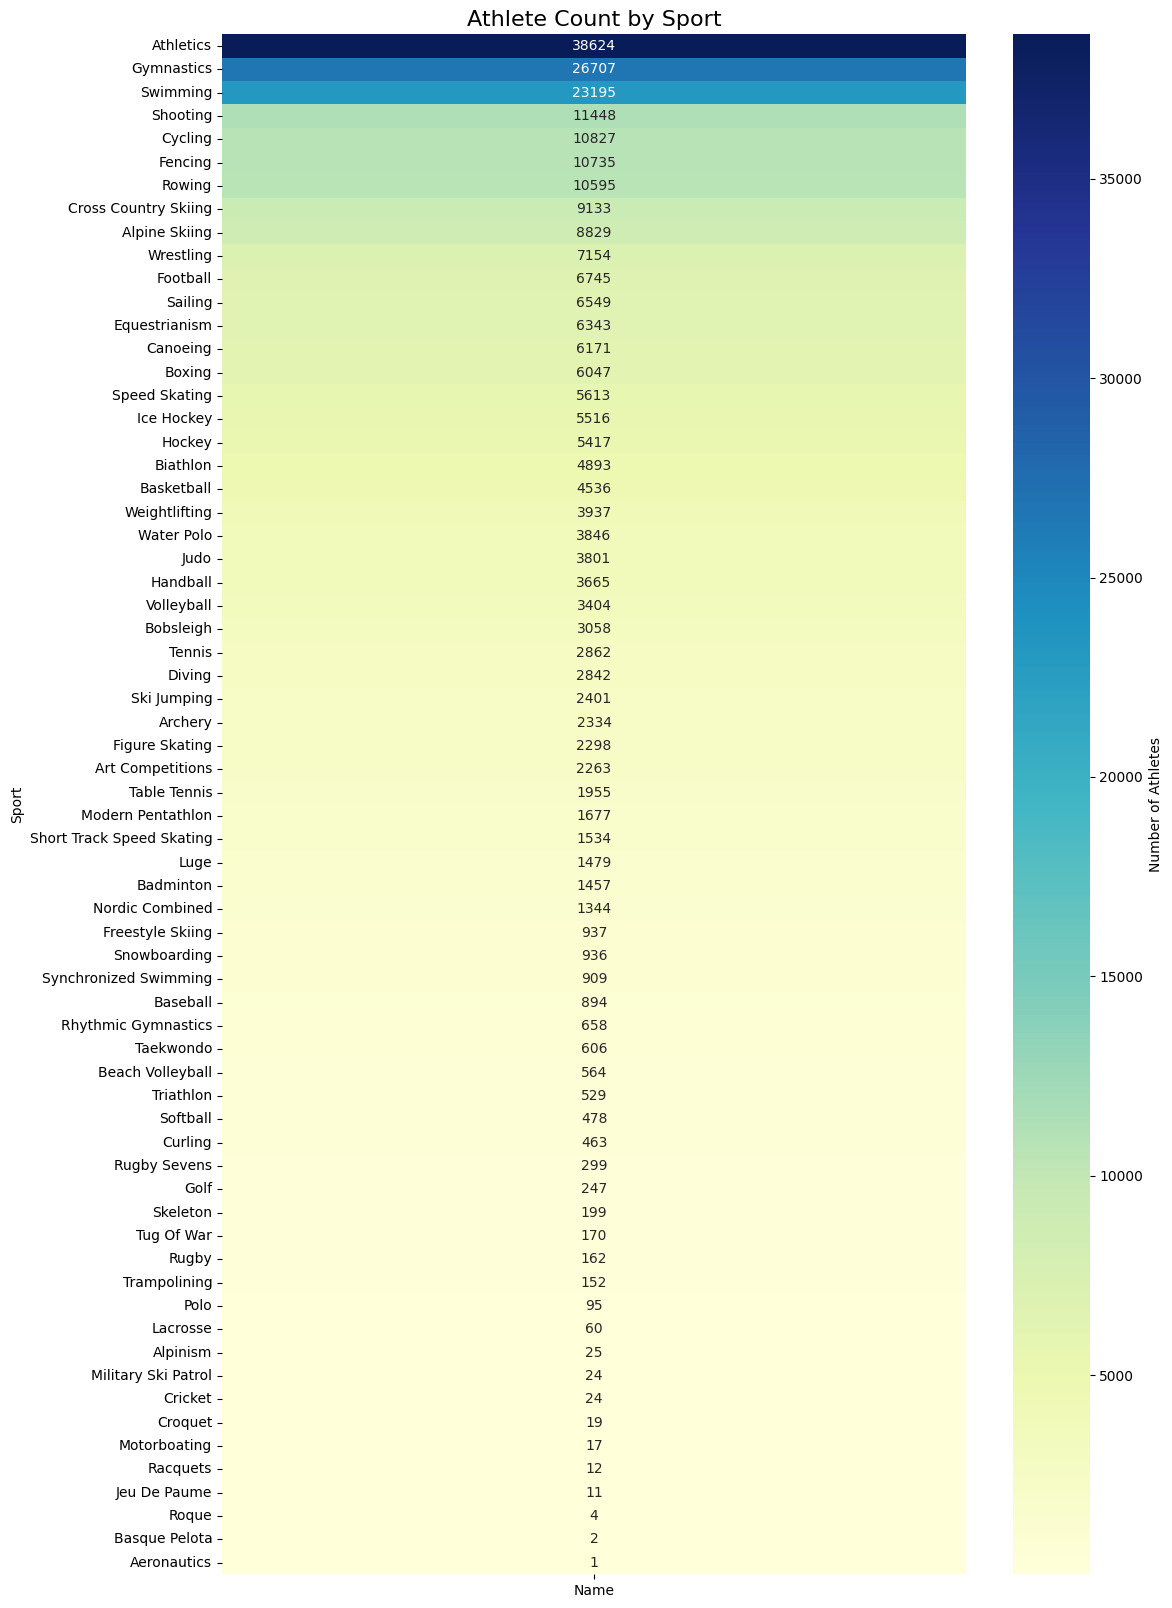

In [38]:
# Plotting the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(sorted_athlete_count, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Athletes'})

# Adding titles and labels
plt.title('Athlete Count by Sport', fontsize=16)

# Show the plot
plt.show()

In [ ]:
# From above observed that there is only one participant in sport Aeronautics
print("1. One person playing in sport Aeronautics: ")
print(data.loc[data['Sport'] == 'Aeronautics', 'Name'].unique())

print("\n2. Two players of Basque Pelota are:")
print(print(data.loc[data['Sport'] == 'Basque Pelota', 'Name'].unique()))

1. One person playing in sport Aeronautics: 
['Hermann Schreiber']

2. Two players of Basque Pelota are:
['Jos de Amzola y Aspiza' 'Francisco Villota y Baquiola']
None


In [ ]:
# Medal Distribution by Gender:

medal_distribution = pd.pivot_table(data, values='Medal', index='Sex', aggfunc="count")
print("Medal Distribution by Gender:")
print(medal_distribution)

Medal Distribution by Gender:
      Medal
Sex        
F     74522
M    196594


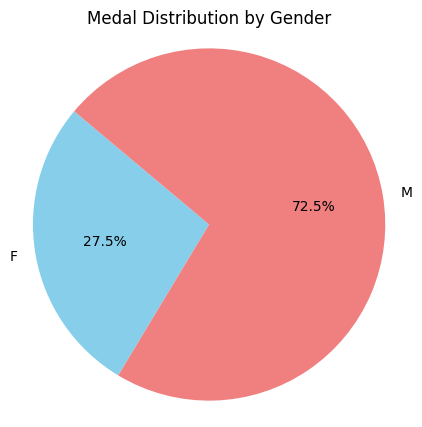

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(5,5))  # Set the figure size
plt.pie(medal_distribution['Medal'], labels=medal_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])

plt.title('Medal Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Total Athletes by Year

total_athletes_by_year = pd.pivot_table(data, values='Name', index='Year', aggfunc='count')
sorted_total_athletes_by_year = total_athletes_by_year.sort_values(by = "Name", ascending=False)
print("Total Athletes by Year:")
print(total_athletes_by_year)

print("\nYears with most number of participants: ")
print(sorted_total_athletes_by_year.head(5))

print("\nYears with least number of participants: ")
print(sorted_total_athletes_by_year.nsmallest(5,"Name"))

Total Athletes by Year:
       Name
Year       
1896    380
1900   1936
1904   1301
1906   1733
1908   3101
1912   4040
1920   4292
1924   5693
1928   5574
1932   3321
1936   7401
1948   7480
1952   9358
1956   6434
1960   9235
1964   9480
1968  10479
1972  11959
1976  10502
1980   8937
1984  11588
1988  14676
1992  16413
1994   3160
1996  13780
1998   3605
2000  13821
2002   4109
2004  13443
2006   4382
2008  13602
2010   4402
2012  12920
2014   4891
2016  13688

Years with most number of participants: 
       Name
Year       
1992  16413
1988  14676
2000  13821
1996  13780
2016  13688

Years with least number of participants: 
      Name
Year      
1896   380
1904  1301
1906  1733
1900  1936
1908  3101


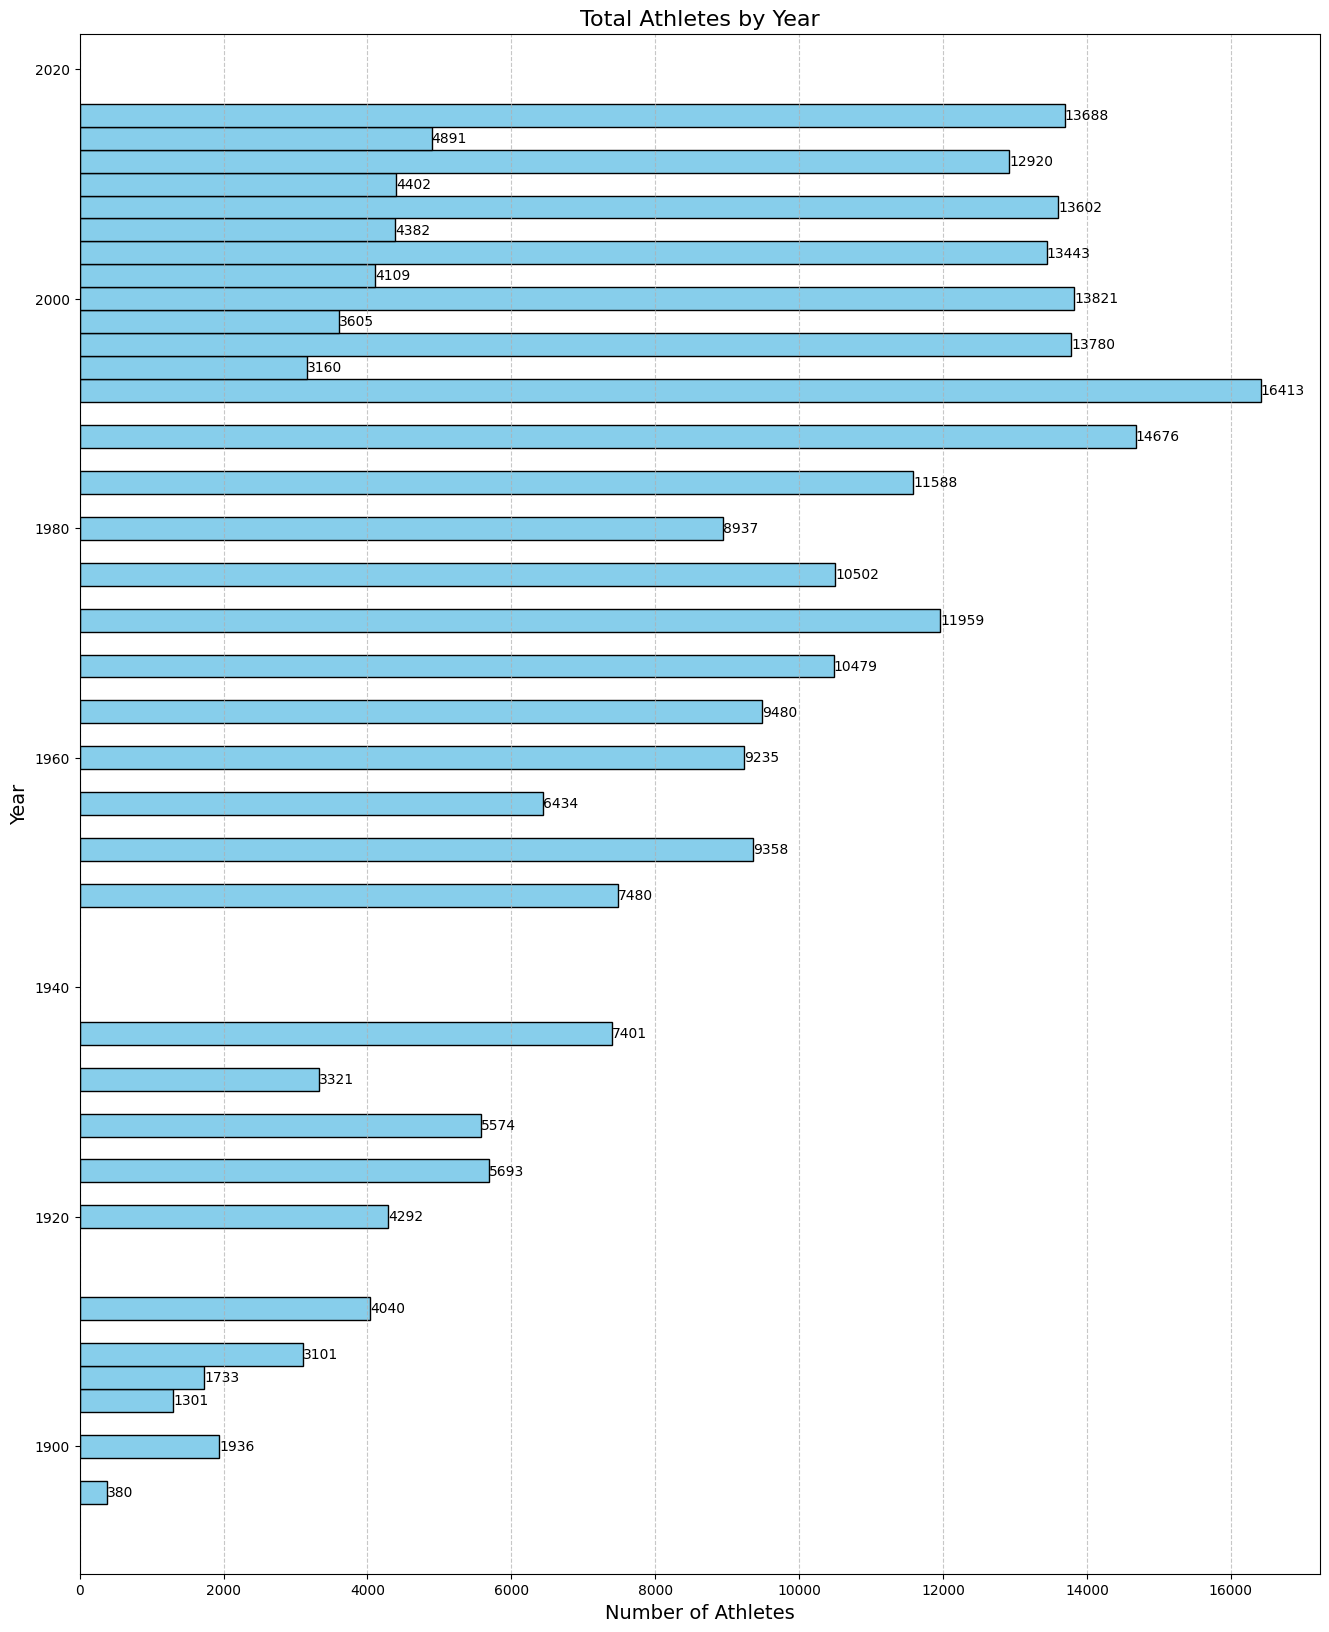

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(16,20))
bar = plt.barh(total_athletes_by_year.index, total_athletes_by_year['Name'], color='skyblue', edgecolor='black', height=1.8)

# Adding titles and labels
plt.title('Total Athletes by Year', fontsize=16)
plt.xlabel('Number of Athletes', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.bar_label(bar)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Finding Gender distribution on the basis of years
# Gender distribution on the basis of years
gender_distribution = data.groupby(['Year', 'Sex']).size().unstack(fill_value=0)
print("Gender Distribution by Year:")
print(gender_distribution)

Gender Distribution by Year:
Sex      F      M
Year             
1896     0    380
1900    33   1903
1904    16   1285
1906    11   1722
1908    47   3054
1912    87   3953
1920   134   4158
1924   261   5432
1928   437   5137
1932   369   2952
1936   549   6852
1948   761   6719
1952  1682   7676
1956  1139   5295
1960  1730   7505
1964  1752   7728
1968  2193   8286
1972  2608   9351
1976  2606   7896
1980  2186   6751
1984  2983   8605
1988  4223  10453
1992  5178  11235
1994  1105   2055
1996  5008   8772
1998  1384   2221
2000  5431   8390
2002  1582   2527
2004  5546   7897
2006  1757   2625
2008  5816   7786
2010  1847   2555
2012  5815   7105
2014  2023   2868
2016  6223   7465


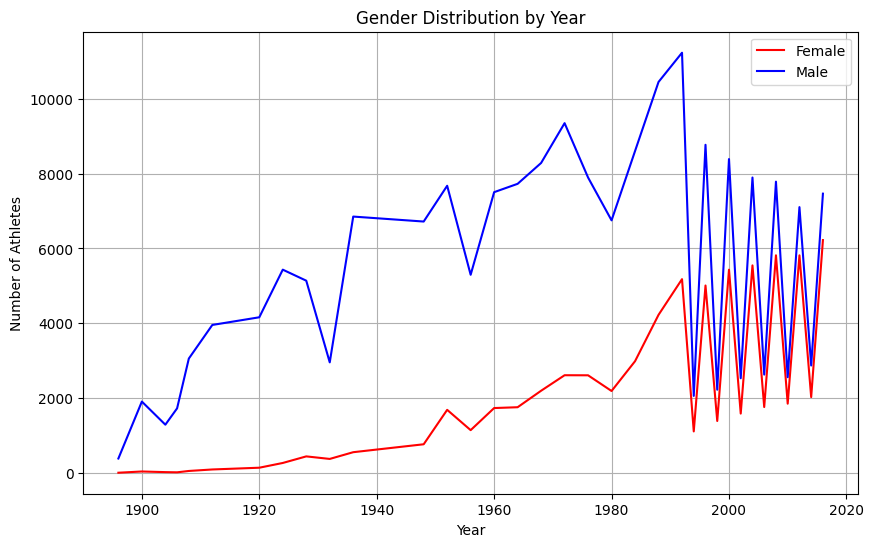

In [ ]:
import matplotlib.pyplot as plt

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(gender_distribution.index, gender_distribution['F'], color='red', label='Female')
plt.plot(gender_distribution.index, gender_distribution['M'], color='blue', label='Male')

# Adding titles and labels
plt.title('Gender Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid()

# Show the plot
plt.show()